In [2]:
import pandas as pd
import torch 
import matplotlib.pyplot as plt

In [3]:
dset = pd.read_csv("advertising.csv")
dset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [4]:
dset.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales,200.0,15.1305,5.283892,1.6,11.000,16.00,19.050,27.0


In [5]:
dset.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


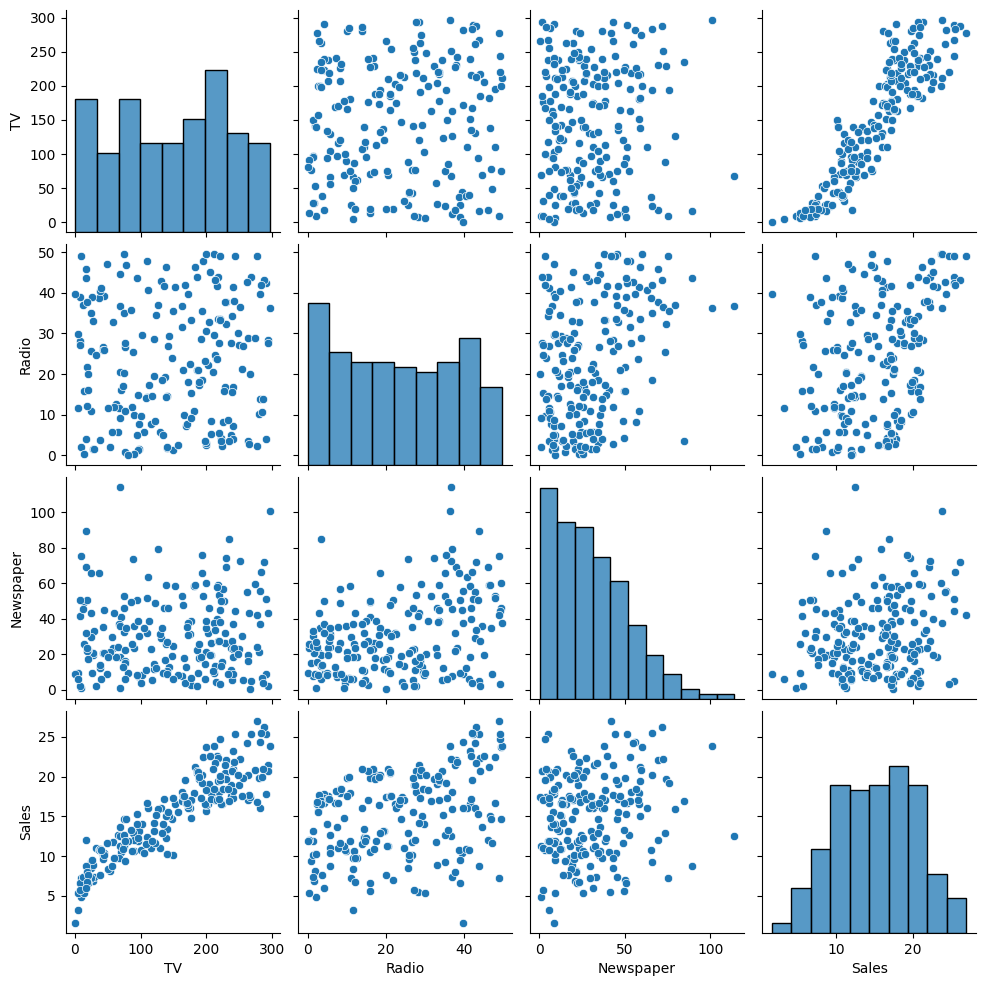

In [6]:
import seaborn as sns
sns.pairplot(dset)

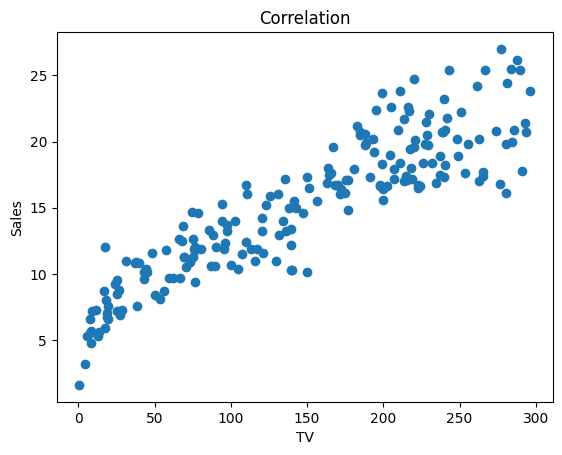

In [7]:
x = dset['TV']
y = dset['Sales']
plt.scatter(x,y)
plt.xlabel("TV")
plt.ylabel("Sales")
plt.title("Correlation")
plt.show()

In [8]:
info= dset["TV"]
X = torch.tensor(info, dtype= torch.float32)
mean = torch.mean(X)
std = torch.std(X)
normalized_X = (X- mean) / std
normalized_X = normalized_X.view(-1,1)
normalized_X

tensor([[ 0.9674],
        [-1.1944],
        [-1.5124],
        [ 0.0519],
        [ 0.3932],
        [-1.6114],
        [-1.0430],
        [-0.3127],
        [-1.6125],
        [ 0.6145],
        [-0.9428],
        [ 0.7881],
        [-1.4355],
        [-0.5771],
        [ 0.6646],
        [ 0.5633],
        [-0.9230],
        [ 1.5649],
        [-0.9067],
        [ 0.0030],
        [ 0.8311],
        [ 1.0525],
        [-1.5590],
        [ 0.9465],
        [-0.9871],
        [ 1.3495],
        [-0.0483],
        [ 1.0839],
        [ 1.1852],
        [-0.8904],
        [ 1.6989],
        [-0.3977],
        [-0.5805],
        [ 1.3809],
        [-0.5980],
        [ 1.6733],
        [ 1.3961],
        [-0.8426],
        [-1.2107],
        [ 0.9430],
        [ 0.6459],
        [ 0.3489],
        [ 1.7071],
        [ 0.6972],
        [-1.4203],
        [ 0.3268],
        [-0.6679],
        [ 1.0816],
        [ 0.9336],
        [-0.9335],
        [ 0.6145],
        [-0.5433],
        [ 0.

In [9]:
info= dset["Sales"]
y = torch.tensor(info, dtype= torch.float32)
mean = torch.mean(y)
std = torch.std(y)
normalized_y = (y- mean) / std
normalized_y = normalized_y.view(-1,1)
normalized_y

tensor([[ 1.3190],
        [-0.8953],
        [-0.5925],
        [ 0.2592],
        [ 0.5241],
        [-1.5009],
        [-0.6303],
        [-0.3654],
        [-1.9551],
        [ 0.0889],
        [-0.4789],
        [ 0.4295],
        [-1.1224],
        [-0.2707],
        [ 0.7323],
        [ 1.3758],
        [-0.4978],
        [ 1.7543],
        [-0.7249],
        [-0.1004],
        [ 0.5431],
        [ 0.4484],
        [-1.8037],
        [ 1.0162],
        [-1.0277],
        [ 0.3538],
        [-0.0247],
        [ 1.0919],
        [ 0.7134],
        [-0.8763],
        [ 1.1865],
        [-0.6114],
        [-0.3654],
        [ 0.4295],
        [-0.6114],
        [ 0.5052],
        [ 1.9435],
        [-0.0815],
        [-0.9520],
        [ 1.2055],
        [ 0.2781],
        [ 0.3727],
        [ 1.0541],
        [ 0.5241],
        [-1.2549],
        [ 0.1835],
        [-0.8574],
        [ 1.5272],
        [ 0.8837],
        [-1.0277],
        [ 0.2403],
        [-0.8385],
        [ 1.

In [10]:
train_split = int(0.8*len(normalized_X))
X_train = normalized_X[:train_split]
y_train = normalized_y[:train_split]
X_test = normalized_X[train_split:]
y_test = normalized_y[train_split:]
X_test

tensor([[ 0.2965],
        [-0.7145],
        [ 0.4817],
        [ 0.1917],
        [-0.3476],
        [ 1.0187],
        [-1.5042],
        [ 0.6960],
        [ 0.7962],
        [ 1.5987],
        [-1.1303],
        [ 0.2033],
        [-1.4844],
        [ 0.2488],
        [ 0.8777],
        [ 1.5125],
        [ 1.1806],
        [ 0.2697],
        [ 1.5102],
        [ 0.2162],
        [ 0.1113],
        [ 0.8323],
        [-1.0581],
        [ 1.6372],
        [ 1.2435],
        [ 0.6751],
        [-0.0879],
        [ 0.5132],
        [ 1.6185],
        [-1.4949],
        [-1.2526],
        [-0.8333],
        [-1.5124],
        [ 0.2301],
        [ 0.0310],
        [-1.2678],
        [-0.6155],
        [ 0.3489],
        [ 1.5906],
        [ 0.9907]])

In [11]:
def plot_pred(train_data = X_train,
              train_label = y_train,
              test_data = X_test,
              test_label = y_test,
              predictions =None):
    plt.figure(figsize=(10,7))
    plt.scatter(train_data,train_label, c= "r", s = 4, label = "train")
    plt.scatter(test_data,test_label, c= "g", s = 4, label = "test")
   
    if predictions is not None:
        plt.scatter(test_data, predictions, c='b', s = 4, label= "Predictions")
    
    plt.legend(prop ={'size':14});
   

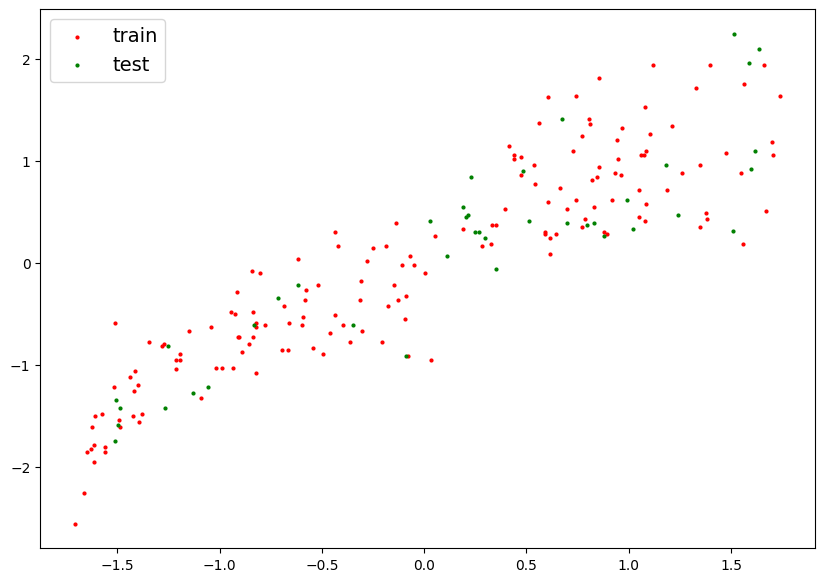

In [12]:
plot_pred();

In [13]:
from torch import nn
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weight = nn.Parameter(torch.randn(1,
                                               requires_grad= True,
                                               dtype= torch.float))
        self.bias = nn.Parameter(torch.randn(1,
                                               requires_grad= True,
                                               dtype= torch.float))
    #forward method to define computation in the model 
    def forward(self,x: torch.Tensor ) -> torch.Tensor :
        return self.weight * x + self.bias

In [14]:
model_0 = LinearRegressionModel()
with torch.inference_mode(): # doesnt keep track of the gradients, save memory
    y_preds = model_0(X_test)



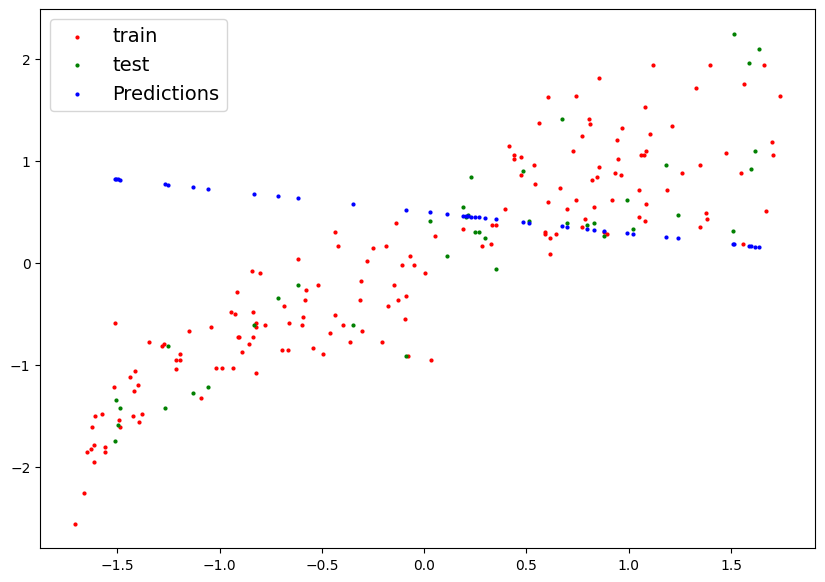

In [15]:
plot_pred(predictions= y_preds)

In [29]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params= model_0.parameters(),
                            lr =  0.001)

In [30]:
epochs= 500
for epoch in range(epochs):
    model_0.train()
    y_pred = model_0(X_train)
    loss = loss_fn(y_pred,y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    model_0.eval()
    with torch.inference_mode():
        test_pred = model_0(X_test)
        test_loss = loss_fn(test_pred, y_test)
    if epoch % 10 == 0:
     print(f"Epoch: {epoch} | Test: {loss} | Test Loss: {test_loss}" )


Epoch: 0 | Test: 0.4071018099784851 | Test Loss: 0.3981834352016449
Epoch: 10 | Test: 0.4045483469963074 | Test Loss: 0.39578595757484436
Epoch: 20 | Test: 0.4020622670650482 | Test Loss: 0.39378219842910767
Epoch: 30 | Test: 0.3996567130088806 | Test Loss: 0.3918467164039612
Epoch: 40 | Test: 0.3973008096218109 | Test Loss: 0.3899258077144623
Epoch: 50 | Test: 0.39509379863739014 | Test Loss: 0.38808727264404297
Epoch: 60 | Test: 0.3929406404495239 | Test Loss: 0.38626930117607117
Epoch: 70 | Test: 0.39092811942100525 | Test Loss: 0.38453298807144165
Epoch: 80 | Test: 0.3890734612941742 | Test Loss: 0.38287144899368286
Epoch: 90 | Test: 0.3872409164905548 | Test Loss: 0.3812158703804016
Epoch: 100 | Test: 0.3854501247406006 | Test Loss: 0.3795906901359558
Epoch: 110 | Test: 0.3838346004486084 | Test Loss: 0.37807321548461914
Epoch: 120 | Test: 0.3823243975639343 | Test Loss: 0.37661099433898926
Epoch: 130 | Test: 0.38081422448158264 | Test Loss: 0.37555426359176636
Epoch: 140 | Test: 

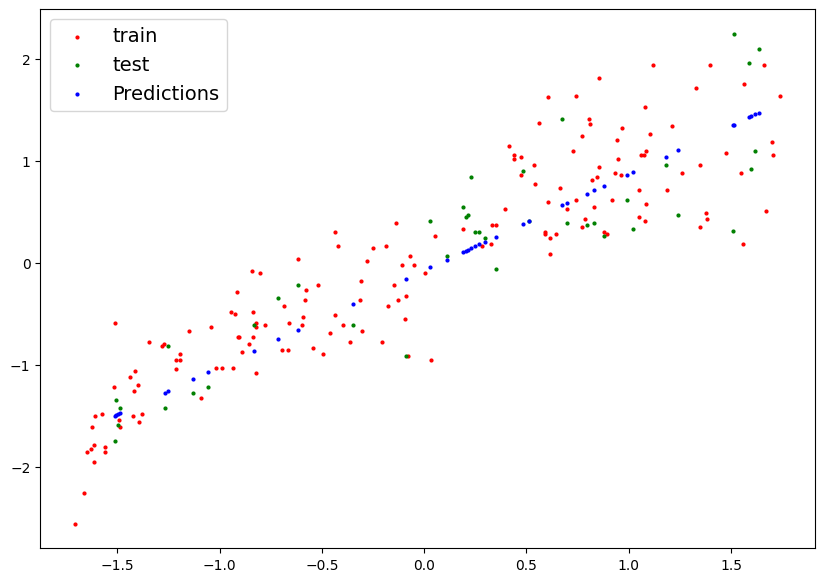

In [31]:
with torch.inference_mode():
 y_pred_new = model_0(X_test)

plot_pred(predictions=  y_pred_new)

## R Squared Test

In [32]:
import numpy as np
from sklearn.metrics import r2_score
y_test_np = y_test.numpy()
test_pred_np = test_pred.numpy()
r2 = r2_score(y_test_np,test_pred_np)
print(f"R² Score: {r2}")

R² Score: 0.7980026523724474
